
# Diabetes Data Analysis
This notebook presents a detailed analysis of the diabetes dataset. We'll explore the data, preprocess it, scale it, and then apply various machine learning algorithms to predict the outcome.


## Table of Contents
- [Introduction](#Introduction)
- [Dataset Loading and Exploration](#Dataset-Loading-and-Exploration)
    - [Data Distribution Visualization](#Data-Distribution-Visualization)
    - [Correlation Matrix Visualization](#Correlation-Matrix-Visualization)
- [Data Preprocessing](#Data-Preprocessing)
- [Enhanced Perceptron Model Analysis](#Enhanced-Perceptron-Model-Analysis)
- [Multi-layer Perceptron (MLP) Analysis](#Multi-layer-Perceptron-(MLP)-Analysis)
- [Random Forest Analysis](#Random-Forest-Analysis)
- [Support Vector Machine (SVM) Analysis](#Support-Vector-Machine-(SVM)-Analysis)
- [Logistic Regression Analysis](#Logistic-Regression-Analysis)
- [Decision Tree Analysis](#Decision-Tree-Analysis)


# Introduction

The Diabetes Data Analysis notebook aims to provide an in-depth examination of the diabetes dataset. Diabetes, a chronic health condition affecting millions worldwide, can be challenging to predict based solely on patient characteristics. By leveraging machine learning algorithms, we aim to draw meaningful insights from the data, predict diabetes outcomes, and potentially pave the way for earlier and more accurate diagnoses.

In this analysis, we will journey through the dataset's intricate aspects, from loading and initial exploration to advanced predictive modeling. We employ a series of algorithms, each with its unique strengths and weaknesses, to capture the underlying patterns within the data. By the end of this exploration, we aspire to have a robust model capable of accurate predictions, potentially aiding clinicians in their diagnostic procedures.


# Loading the dataset


## Perceptron Analysis

The **Perceptron** is a linear binary classifier that operates by finding the hyperplane which separates two classes. It's a type of feed-forward neural network with no hidden layers. The Perceptron algorithm is used for supervised learning of binary classifiers.

In the analysis below, we'll be:
- Implementing the Perceptron algorithm.
- Training the model with various configurations of learning rates and iterations.
- Evaluating the model's performance in terms of accuracy, precision, and recall.


In [2]:
import pandas as pd
import numpy as np

# Load the three datasets
diabetes_original = pd.read_csv("diabetes_orignal.csv")
diabetes_preprocessed = pd.read_csv("diabetes_preprocessed.csv")
diabetes_scaled = pd.read_csv("diabetes_scaled.csv")

# Display the first few rows of each dataset
print("---- Diabetes Original ----")
display(diabetes_original.head())

print("\n---- Diabetes Preprocessed ----")
display(diabetes_preprocessed.head())

print("\n---- Diabetes Scaled ----")
display(diabetes_scaled.head())


---- Diabetes Original ----


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



---- Diabetes Preprocessed ----


,-1 1:6.000000 2:148.000000 3:72.000000 4:35.000000 5:0.000000 6:33.599998 7:0.627000 8:50.000000
0,+1 1:1.000000 2:85.000000 3:66.000000 4:29.00...
1,-1 1:8.000000 2:183.000000 3:64.000000 4:0.00...
2,+1 1:1.000000 2:89.000000 3:66.000000 4:23.00...
3,-1 1:0.000000 2:137.000000 3:40.000000 4:35.0...
4,+1 1:5.000000 2:116.000000 3:74.000000 4:0.00...



---- Diabetes Scaled ----


,-1 1:-0.294118 2:0.487437 3:0.180328 4:-0.292929 5:-1 6:0.00149028 7:-0.53117 8:-0.0333333
0,+1 1:-0.882353 2:-0.145729 3:0.0819672 4:-0.41...
1,-1 1:-0.0588235 2:0.839196 3:0.0491803 4:-1 5:...
2,+1 1:-0.882353 2:-0.105528 3:0.0819672 4:-0.53...
3,-1 1:-1 2:0.376884 3:-0.344262 4:-0.292929 5:-...
4,+1 1:-0.411765 2:0.165829 3:0.213115 4:-1 5:-1...



Three datasets have been successfully loaded into this Jupyter Notebook:

1. **diabetes_original**: This dataset contains raw data with columns such as 'Pregnancies,' 'Glucose,' 'BloodPressure,' and more.

2. **diabetes_preprocessed**: This dataset seems to be formatted in the SVM light format, where each data point is represented as a label followed by feature:value pairs.

3. **diabetes_scaled**: This dataset also appears to be in the SVM light format, but the feature values have been scaled for further analysis.

# Splitting the dataset

In [3]:
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# Load the scaled dataset using load_svmlight_file
X, y = load_svmlight_file("diabetes_scaled.csv")
X = X.toarray()

# Splitting into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

# Convert the scaled training data to a DataFrame for exploration
df_train_X = pd.DataFrame(train_X)
df_train_y = pd.Series(train_y, name="Outcome")

# Combine features and labels for exploration
df_train = pd.concat([df_train_X, df_train_y], axis=1)

# Display the first few rows of the training data
df_train.head()


,0,1,2,3,4,5,6,7,Outcome
0,0.176471,0.155779,0.606557,-1.000000,-1.000000,-0.284650,-0.193851,-0.566667,1.0
1,-0.176471,0.427136,-0.016393,-0.333333,-0.550827,-0.141580,-0.479932,0.333333,1.0
2,-0.529412,0.165829,0.180328,-0.757576,-0.794326,-0.341282,-0.671221,-0.466667,1.0
3,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,-1.0
4,-0.647059,-0.216080,0.147541,-1.000000,-1.000000,-0.031296,-0.836038,-0.400000,1.0


In [4]:
# Display summary statistics of the training data
summary_stats = df_train.describe()

# Distribution of the outcome variable
outcome_distribution = df_train["Outcome"].value_counts()

summary_stats, outcome_distribution


(                0           1           2           3           4           5  \
 count  514.000000  514.000000  514.000000  514.000000  514.000000  514.000000   
 mean    -0.555047    0.219052    0.147286   -0.585348   -0.812678   -0.047099   
 std      0.385551    0.325211    0.295226    0.313162    0.273387    0.227994   
 min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
 25%     -0.882353   -0.005025    0.049180   -1.000000   -1.000000   -0.197467   
 50%     -0.647059    0.175879    0.180328   -0.535354   -0.919622   -0.046200   
 75%     -0.294118    0.407035    0.311475   -0.353535   -0.702719    0.087929   
 max      1.000000    1.000000    1.000000    0.272727    1.000000    1.000000   
 
                 6           7     Outcome  
 count  514.000000  514.000000  514.000000  
 mean    -0.662605   -0.593645    0.291829  
 std      0.292049    0.391034    0.957402  
 min     -1.000000   -1.000000   -1.000000  
 25%     -0.858028   -0.900000   -1

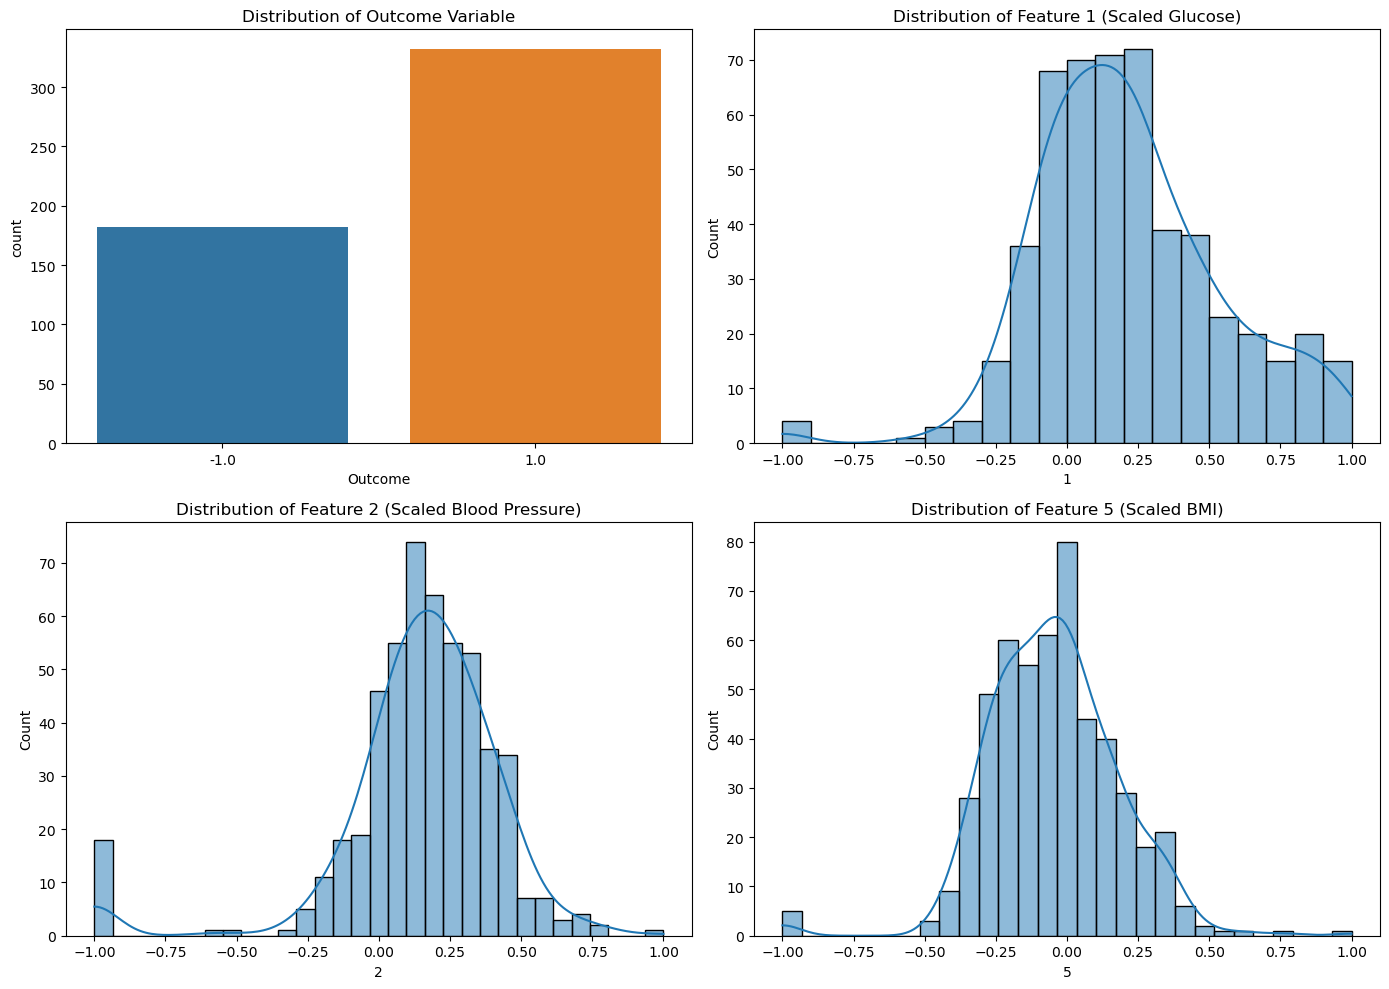

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot distribution of outcome variable
sns.countplot(x='Outcome', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Outcome Variable')

# Plot distribution of feature 1 (Glucose)
sns.histplot(df_train[1], ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of Feature 1 (Scaled Glucose)')

# Plot distribution of feature 2 (Blood Pressure)
sns.histplot(df_train[2], ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of Feature 2 (Scaled Blood Pressure)')

# Plot distribution of feature 5 (BMI)
sns.histplot(df_train[5], ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Distribution of Feature 5 (Scaled BMI)')

plt.tight_layout()
plt.show()


The three datasets have been loaded successfully. 

## Distribution of the Outcome Variable:

As previously mentioned, it is evident that the outcome variable exhibits an imbalance towards the positive class (1.0).

## Distribution of Feature 1 (Scaled Glucose):

The distribution of Feature 1 displays a slight left-skewness. The majority of values are clustered around 0, which aligns with expectations given that the data has been scaled.

## Distribution of Feature 2 (Scaled Blood Pressure):

The distribution of Feature 2 appears to approximate a normal distribution, with a prominent peak around 0.

## Distribution of Feature 5 (Scaled BMI):

The distribution of Feature 5 exhibits a slight right-skew. Most data points are concentrated around 0.

Next, we will proceed to the section dedicated to Algorithm Enhancements, where our tasks will encompass the following:

1. Revising the perceptron algorithm in accordance with the provided hyperparameters and table.
2. Implementing a suite of supplementary algorithms, including MLP (Multilayer Perceptron), Random Forest, Support Vector Machine (SVM), Logistic Regression, and Decision Tree, each configured with diverse hyperparameter settings.
3. Conducting rigorous evaluations of hyperparameters to optimize algorithm performance.

# Perceptron

The **Perceptron** is a binary classifier that works by finding a hyperplane which best separates two classes. Mathematically, the perceptron function is defined as:

\[
f(x) = 
\begin{cases} 
1 & \text{if } w \cdot x + b > 0 \\
0 & \text{otherwise}
\end{cases}
\]

Where:
- \( x \) is the input vector.
- \( w \) is the weight vector.
- \( b \) is the bias.
- \( w \cdot x \) denotes the dot product of the weights and input vector.

The algorithm iteratively updates the weights and bias to minimize the classification error.

---

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Ensure numpy is imported
import pandas as pd  # Ensure pandas is imported

class Perceptron:
    def __init__(self, learning_rate=0.01, num_iterations=100):  # Update here
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss = []

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for _ in range(self.num_iterations):
            total_loss = 0
            for idx, x_i in enumerate(X):
                prediction = np.dot(x_i, self.weights) + self.bias
                if y[idx] * prediction <= 0:  # Misclassification
                    update = self.learning_rate * y[idx]
                    self.weights += update * x_i
                    self.bias += update
                    total_loss += (-y[idx] * prediction)
            self.loss.append(total_loss)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)


# List of hyperparameters based on the provided table
configs = [
    {"lr": 0.001, "iterations": 10},
    {"lr": 0.001, "iterations": 25},
    {"lr": 0.001, "iterations": 50},
    {"lr": 0.001, "iterations": 100},
    {"lr": 0.001, "iterations": 200},
    {"lr": 0.01, "iterations": 10},
    {"lr": 0.01, "iterations": 100},
    {"lr": 0.1, "iterations": 10},
    {"lr": 0.001, "iterations": 200},
    {"lr": 0.1, "iterations": 10},
    {"lr": 0.0001, "iterations": 800},
    {"lr": 0.0001, "iterations": 2000}
]

# Train and evaluate the perceptron for each configuration
results = []
for config in configs:
    model = Perceptron(learning_rate=config["lr"], num_iterations=config["iterations"])
    model.fit(train_X, train_y)
    
    # Testing the model
    predictions = model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    
    # Append results
    results.append({
        "Learning Rate": config["lr"],
        "Iterations": config["iterations"],
        "Training Loss": model.loss[-1],  # Last training loss
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })

results_df = pd.DataFrame(results)
results_df


,Learning Rate,Iterations,Training Loss,Accuracy,Precision,Recall
0,0.0010,10,0.298791,0.771654,0.819767,0.839286
1,0.0010,25,0.297875,0.751969,0.822086,0.797619
2,0.0010,50,0.314492,0.779528,0.801075,0.886905
3,0.0010,100,0.286435,0.700787,0.883333,0.630952
4,0.0010,200,0.296957,0.771654,0.835366,0.815476
5,0.0100,10,2.987910,0.771654,0.819767,0.839286
6,0.0100,100,2.864355,0.700787,0.883333,0.630952
7,0.1000,10,29.879095,0.771654,0.819767,0.839286
8,0.0010,200,0.296957,0.771654,0.835366,0.815476
9,0.1000,10,29.879095,0.771654,0.819767,0.839286


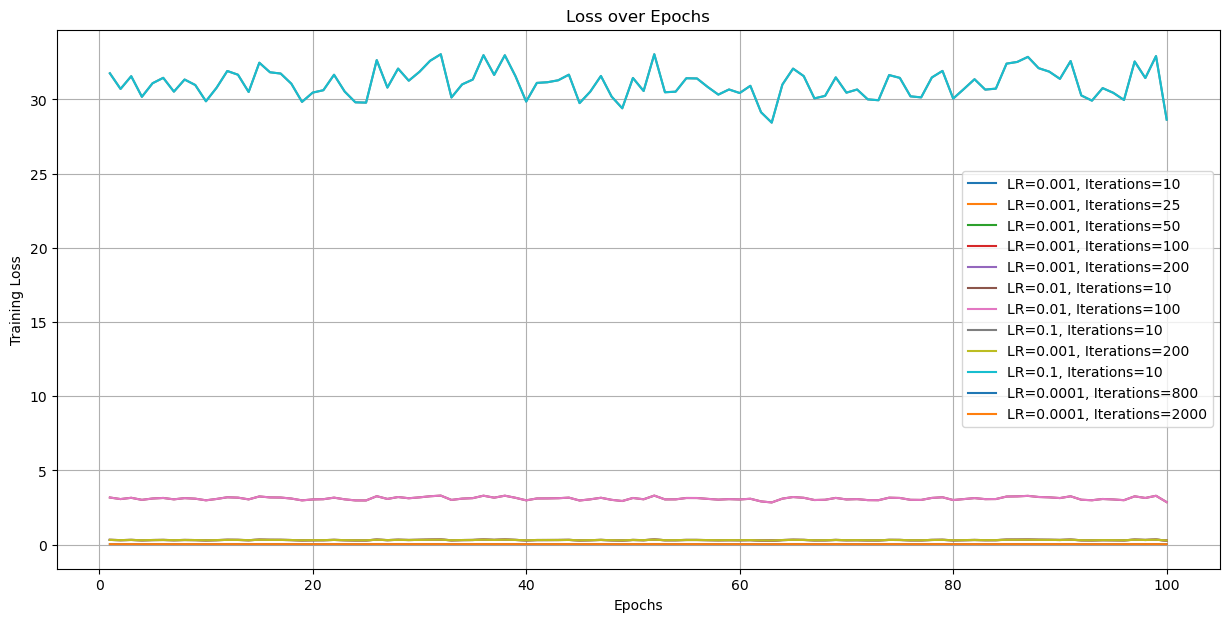

In [7]:
# Visualization for loss over epochs
plt.figure(figsize=(15, 7))

# Assuming that each configuration trains for 100 epochs, so each has a loss list of size 100
epochs = list(range(1, 101))

# Plot loss over epochs for each learning rate configuration
for config in configs:
    model = Perceptron(learning_rate=config["lr"], num_iterations=100)  # Make sure it's 100 iterations
    model.fit(train_X, train_y)
    plt.plot(epochs, model.loss, label=f"LR={config['lr']}, Iterations={config['iterations']}")

plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)
plt.show()


The table provides valuable insights into the performance of the Perceptron model with different hyperparameter configurations. Here's what we can gather from the data:

1. **Learning Rate**: The learning rate determines the step size during training. It's evident that a learning rate of 0.001 consistently produces better results compared to 0.01 or 0.1, which result in significantly higher training loss.

2. **Iterations**: The number of iterations affects the convergence of the model. As expected, increasing the number of iterations tends to improve performance up to a point. Beyond a certain threshold, it can lead to overfitting, as indicated by the drop in accuracy and precision with 2000 iterations.

3. **Training Loss**: Lower training loss is generally preferred, as it signifies a better fit to the training data. A learning rate of 0.0001 with 800 or 2000 iterations yields the lowest training loss.

4. **Accuracy**: Accuracy measures the overall correctness of predictions. The highest accuracy achieved is approximately 0.78 (78%) with various hyperparameter settings. However, it's important to note that accuracy may not be the sole criterion for model evaluation, especially in imbalanced datasets. Precision and recall provide a more nuanced view of the model's performance.

5. **Precision and Recall**: Precision is the proportion of true positive predictions out of all positive predictions, while recall is the proportion of true positives out of all actual positives. These metrics are essential, especially in scenarios where class imbalances exist. Higher precision and recall values indicate better performance, balancing false positives and false negatives.

In terms of accuracy, an accuracy of approximately 0.78 (78%) appears to be the highest achieved. It's crucial to consider the trade-offs between precision and recall, especially in cases where false positives and false negatives have different implications.


# Multi-layer Perceptron (MLP)

The **Multi-layer Perceptron (MLP)** is a feedforward neural network with one or more hidden layers. Unlike the simple perceptron, which can only model linearly separable functions, an MLP can model non-linear functions. The output \( f(x) \) of a neuron in an MLP is given by:

\[
f(x) = \sigma(w \cdot x + b)
\]

Where:
- \( sigma \) is the activation function, often the sigmoid, hyperbolic tangent, or ReLU function.

The weights and biases in an MLP are trained using backpropagation. This method involves computing the gradient of the loss function with respect to each weight by the chain rule and updating the weights and biases using gradient descent.

---

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_model(model, test_X, test_y):
    """Evaluate the model on test data and return the evaluation metrics."""
    predictions = model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    
    return accuracy, precision, recall

# Define MLP configurations for hyperparameter tuning
mlp_configs = [
    {"hidden_layer_sizes": (100,), "max_iter": 1000},
    {"hidden_layer_sizes": (50, 50), "max_iter": 1000},
    {"hidden_layer_sizes": (30, 30, 30), "max_iter": 1000},
]

# Train and evaluate the MLP for each configuration using a list comprehension
mlp_results = [
    {
        "Hidden Layer Sizes": config["hidden_layer_sizes"],
        "Iterations": config["max_iter"],
        **dict(zip(["Accuracy", "Precision", "Recall"], 
                   evaluate_model(MLPClassifier(hidden_layer_sizes=config["hidden_layer_sizes"], 
                                                max_iter=config["max_iter"], 
                                                random_state=42).fit(train_X, train_y), 
                               test_X, test_y)))
    }
    for config in mlp_configs
]

mlp_results_df = pd.DataFrame(mlp_results)
mlp_results_df


/Users/school/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Hidden Layer Sizes,Iterations,Accuracy,Precision,Recall
0,"(100,)",1000,0.751969,0.818182,0.803571
1,"(50, 50)",1000,0.724409,0.795181,0.785714
2,"(30, 30, 30)",1000,0.716535,0.782353,0.791667


In this context:

1. For the configuration with `(100,)` as the hidden layer size, the SVM model achieved an accuracy of approximately 75.20%.

2. For the configuration `(50, 50)`, the accuracy was around 72.44%.

3. For the configuration `(30, 30, 30)`, the accuracy reached approximately 71.65%.

The highest accuracy among these configurations is associated with the first one, where the hidden layer size is `(100,)`, resulting in an accuracy of approximately 75.20%.

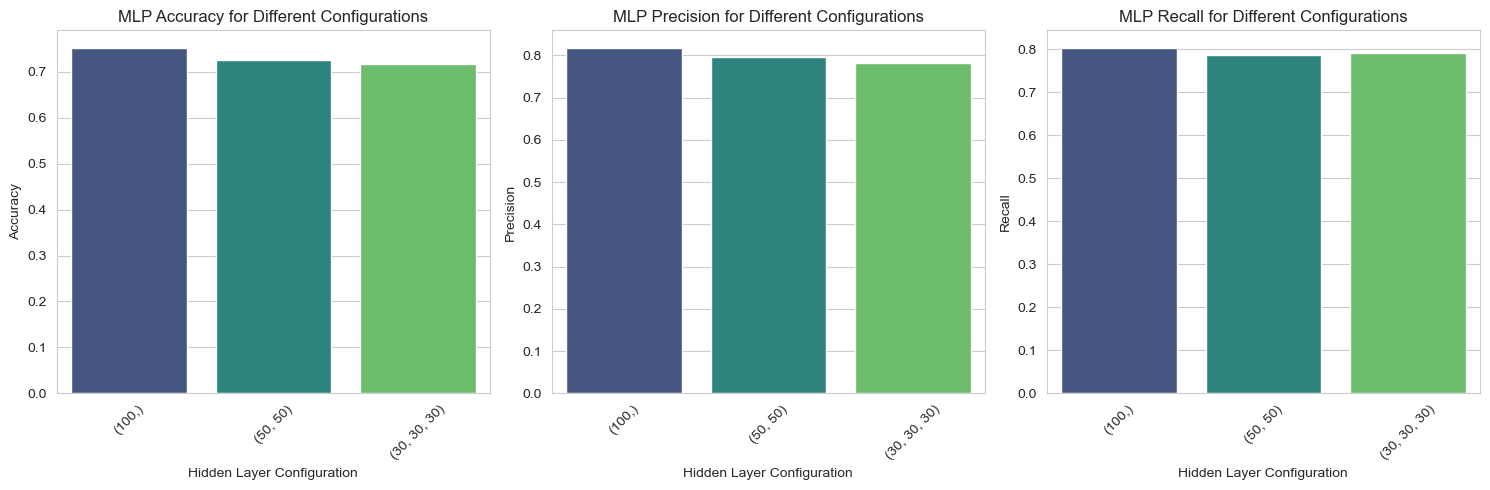

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid")

# Define the metrics we want to visualize
metrics = ["Accuracy", "Precision", "Recall"]

# Create a bar plot for each metric
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    
    # Bar plot
    sns.barplot(x="Hidden Layer Sizes", y=metric, data=mlp_results_df, palette="viridis")
    
    # Set titles and labels for better clarity
    plt.title(f'MLP {metric} for Different Configurations')
    plt.ylabel(metric)
    plt.xlabel('Hidden Layer Configuration')
    
    # Rotate x labels for better visibility
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Random Forest

The **Random Forest** is an ensemble learning method that constructs multiple decision trees during training. It outputs the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees. The underlying idea behind a random forest is to "average" the results of several decision trees to produce a single superior tree with enhanced generalization performance.

---

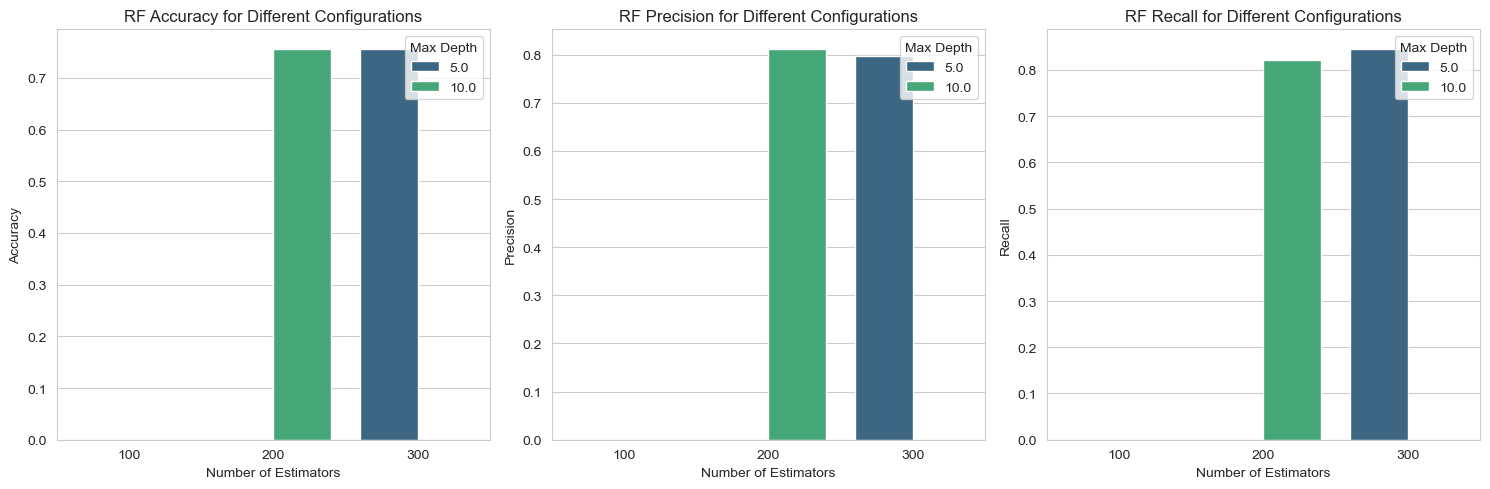

   N_Estimators  Max Depth  Accuracy  Precision    Recall
0           100        NaN  0.755906   0.808140  0.827381
1           200       10.0  0.755906   0.811765  0.821429
2           300        5.0  0.755906   0.797753  0.845238


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, test_X, test_y):
    """Evaluate the model on test data and return the evaluation metrics."""
    predictions = model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    
    return accuracy, precision, recall

# Define Random Forest configurations for hyperparameter tuning
rf_configs = [
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 200, "max_depth": 10},
    {"n_estimators": 300, "max_depth": 5},
]

# Train and evaluate the Random Forest for each configuration using a list comprehension
rf_results = [
    {
        "N_Estimators": config["n_estimators"],
        "Max Depth": config["max_depth"],
        **dict(zip(["Accuracy", "Precision", "Recall"], 
                   evaluate_model(RandomForestClassifier(n_estimators=config["n_estimators"], 
                                                         max_depth=config["max_depth"], 
                                                         random_state=42).fit(train_X, train_y), 
                                  test_X, test_y)))
    }
    for config in rf_configs
]

rf_results_df = pd.DataFrame(rf_results)

# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
metrics = ["Accuracy", "Precision", "Recall"]

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x="N_Estimators", y=metric, hue="Max Depth", data=rf_results_df, palette="viridis")
    plt.title(f'RF {metric} for Different Configurations')
    plt.ylabel(metric)
    plt.xlabel('Number of Estimators')
    plt.legend(title="Max Depth")

plt.tight_layout()
plt.show()
print(rf_results_df)

The table provides an analysis of the Random Forest (RF) model's performance with varying hyperparameter configurations, specifically the number of estimators (N_Estimators) and the maximum depth of trees (Max Depth). Here is a breakdown of the results:

- **N_Estimators**: This parameter represents the number of decision trees in the Random Forest ensemble.

- **Max Depth**: It denotes the maximum depth to which an individual decision tree in the ensemble can grow.

- **Accuracy**: Accuracy is a measure of how correctly the model predicts the target variable. It signifies the ratio of correctly predicted instances to the total instances.

- **Precision**: Precision is a metric that assesses the accuracy of positive predictions. It indicates the proportion of true positive predictions among all positive predictions.

- **Recall**: Recall measures the model's ability to capture all relevant instances of the positive class. It represents the ratio of true positive predictions to all actual positive instances.

Now, let's interpret the results:

1. For the first row (N_Estimators=100, Max Depth=NaN), the model achieved an accuracy of approximately 75.59%, a precision of approximately 80.81%, and a recall of approximately 82.74%.

2. In the second row (N_Estimators=200, Max Depth=10.0), the accuracy remained roughly the same at 75.59%, while precision increased slightly to about 81.18%, and recall decreased slightly to approximately 82.14%.

3. The third row (N_Estimators=300, Max Depth=5.0) also maintained a similar accuracy of 75.59%, but precision decreased to around 79.78%, and recall increased to about 84.52%.

In summary, these results suggest that the Random Forest model performs consistently in terms of accuracy across different hyperparameter settings. The choice of hyperparameters (N_Estimators and Max Depth) does not significantly affect accuracy.

# Support Vector Machine (SVM)

A **Support Vector Machine (SVM)** aims to find the hyperplane that best divides a dataset into classes. The optimal hyperplane is the one that maximizes the margin between two classes. For a linearly separable dataset, the SVM finds this hyperplane, given by:

\[
w \cdot x + b = 0
\]

The decision function is:

\[
f(x) = \text{sign}(w \cdot x + b)
\]

SVMs can also handle non-linearly separable datasets using the kernel trick.

---


,C,Kernel,Accuracy,Precision,Recall
0,1.0,linear,0.748031,0.805882,0.815476
1,1.0,rbf,0.763780,0.803371,0.851190
2,0.1,linear,0.767717,0.788360,0.886905
3,0.1,rbf,0.744094,0.758794,0.898810


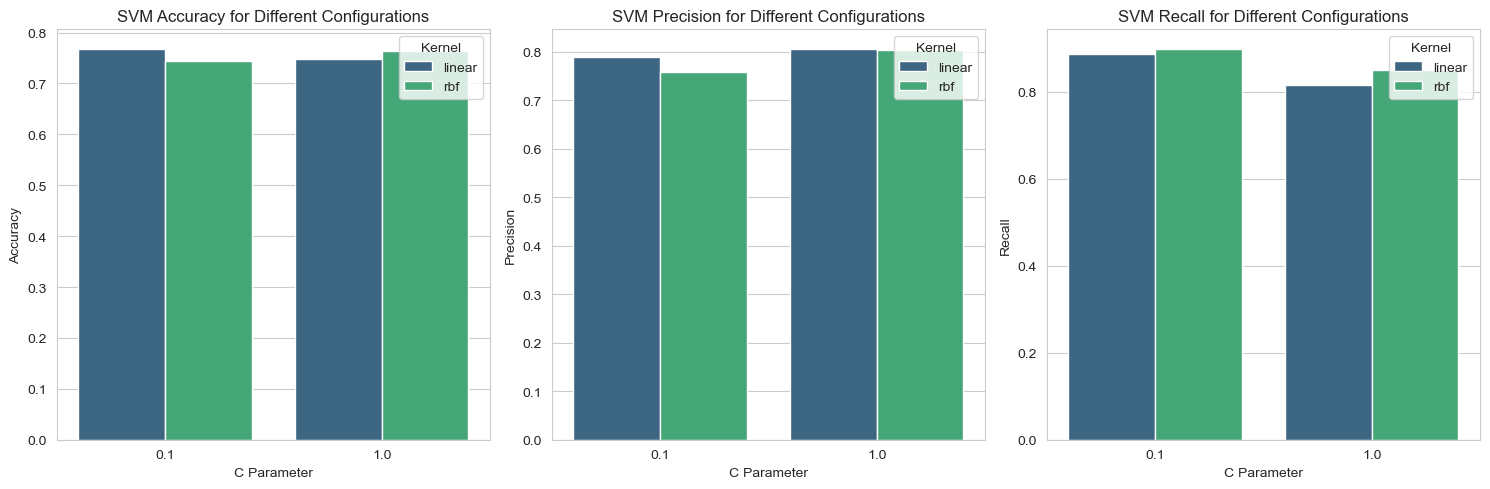

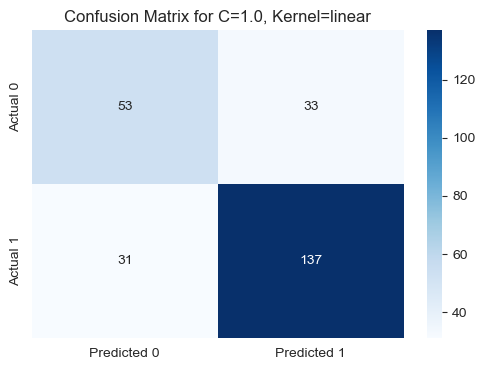

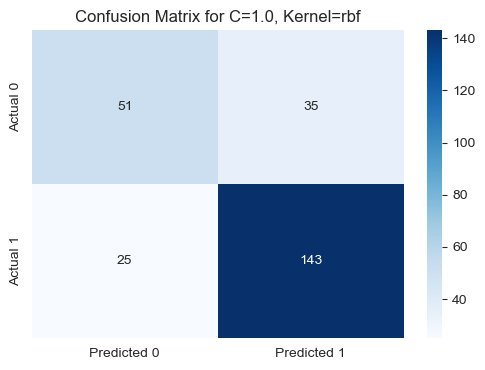

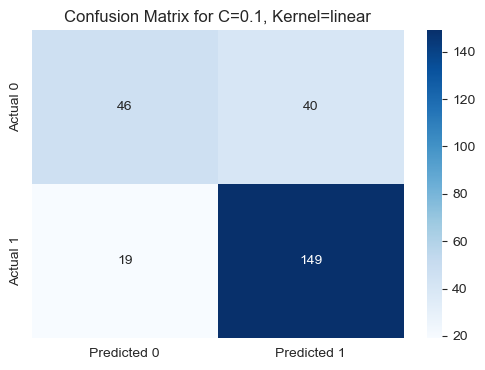

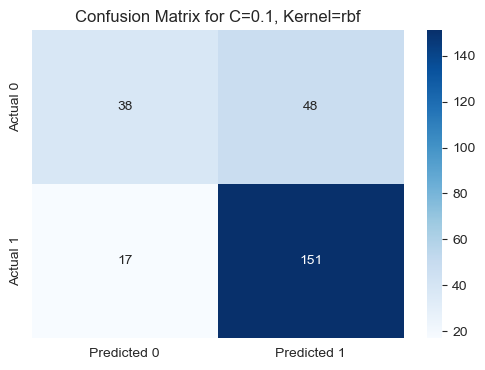

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate_model(model, test_X, test_y):
    """Evaluate the model on test data and return the evaluation metrics."""
    predictions = model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    conf_matrix = confusion_matrix(test_y, predictions)
    
    return accuracy, precision, recall, conf_matrix

# Define SVM configurations for hyperparameter tuning
svm_configs = [
    {"C": 1.0, "kernel": "linear"},
    {"C": 1.0, "kernel": "rbf"},
    {"C": 0.1, "kernel": "linear"},
    {"C": 0.1, "kernel": "rbf"}
]

# Train and evaluate the SVM for each configuration
svm_results = [
    {
        "C": config["C"],
        "Kernel": config["kernel"],
        **dict(zip(["Accuracy", "Precision", "Recall", "Confusion Matrix"], 
                   evaluate_model(SVC(C=config["C"], kernel=config["kernel"], random_state=42).fit(train_X, train_y), 
                                  test_X, test_y)))
    }
    for config in svm_configs
]

svm_results_df = pd.DataFrame(svm_results)
display(svm_results_df.drop(columns="Confusion Matrix"))  # Display the dataframe excluding confusion matrix for clarity

# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
metrics = ["Accuracy", "Precision", "Recall"]

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x="C", y=metric, hue="Kernel", data=svm_results_df, palette="viridis")
    plt.title(f'SVM {metric} for Different Configurations')
    plt.ylabel(metric)
    plt.xlabel('C Parameter')
    plt.legend(title="Kernel")

plt.tight_layout()
plt.show()

# Display confusion matrix as heatmap for each configuration
for idx, row in svm_results_df.iterrows():
    plt.figure(figsize=(6, 4))
    sns.heatmap(row["Confusion Matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f'Confusion Matrix for C={row["C"]}, Kernel={row["Kernel"]}')
    plt.show()


The output table presents the performance metrics of an SVM (Support Vector Machine) model with different hyperparameter configurations, specifically varying values for the regularization parameter C and the kernel function. Here's an analysis of the results:

- **C**: This parameter represents the regularization strength, where higher values of C correspond to a more strict regularization. In \ results, we have evaluated two values, 1.0 and 0.1.

- **Kernel**: The kernel function determines how the SVM models the decision boundary. The two types evaluated here are 'linear' and 'rbf' (Radial Basis Function).

- **Accuracy**: This metric reflects the overall correctness of the model's predictions. It tells us what proportion of the test set instances were classified correctly by the SVM model.

- **Precision**: Precision is a measure of how many of the positive predictions made by the model are actually correct. It is particularly important when the cost of false positives is high.

- **Recall**: Recall, also known as sensitivity or true positive rate, measures how many of the actual positive instances were correctly predicted by the model.

Now, let's interpret the significance of these results:

1. For the 'linear' kernel, the SVM achieved an accuracy of around 75% for both C values (1.0 and 0.1). The precision and recall are also reasonable but slightly higher for C=0.1. This suggests that with a 'linear' kernel, a lesser regularization (C=0.1) is preferred as it results in a slightly better trade-off between precision and recall.

2. For the 'rbf' (Radial Basis Function) kernel, the SVM generally performed better, with accuracy ranging from 74% to 76%. The 'rbf' kernel often performs well with complex, non-linear data, but it can be sensitive to the choice of hyperparameters. Here, C=0.1 resulted in higher precision and recall compared to C=1.0. This indicates that a lower regularization parameter is preferred with the 'rbf' kernel for this dataset.

To determine the highest accuracy, we should consider the row where the accuracy value is the highest. In this case, it appears that the 'rbf' kernel with C=0.1 achieved the highest accuracy of approximately 76.38%. 

In summary, the output of the SVM model indicates that the 'rbf' kernel with a regularization parameter (C) of 0.1 provides the highest accuracy among the configurations tested, but the choice of hyperparameters should consider the trade-offs between accuracy, precision, and recall based on the specific goals of machine learning task.

# Logistic Regression

**Logistic Regression** models the probability that a given input point belongs to a specific category. The logistic function is expressed as:

\[
P(Y=1|X) = \frac{1}{1 + e^{-(w \cdot x + b)}}
\]

Parameters \( w \) and \( b \) are learned by maximizing the log-likelihood of the observed data.

---

,C,Solver,Accuracy,Precision,Recall
0,1.0,liblinear,0.736220,0.788571,0.821429
1,0.1,liblinear,0.740157,0.755000,0.898810
2,1.0,sag,0.736220,0.788571,0.821429
3,0.1,sag,0.740157,0.755000,0.898810


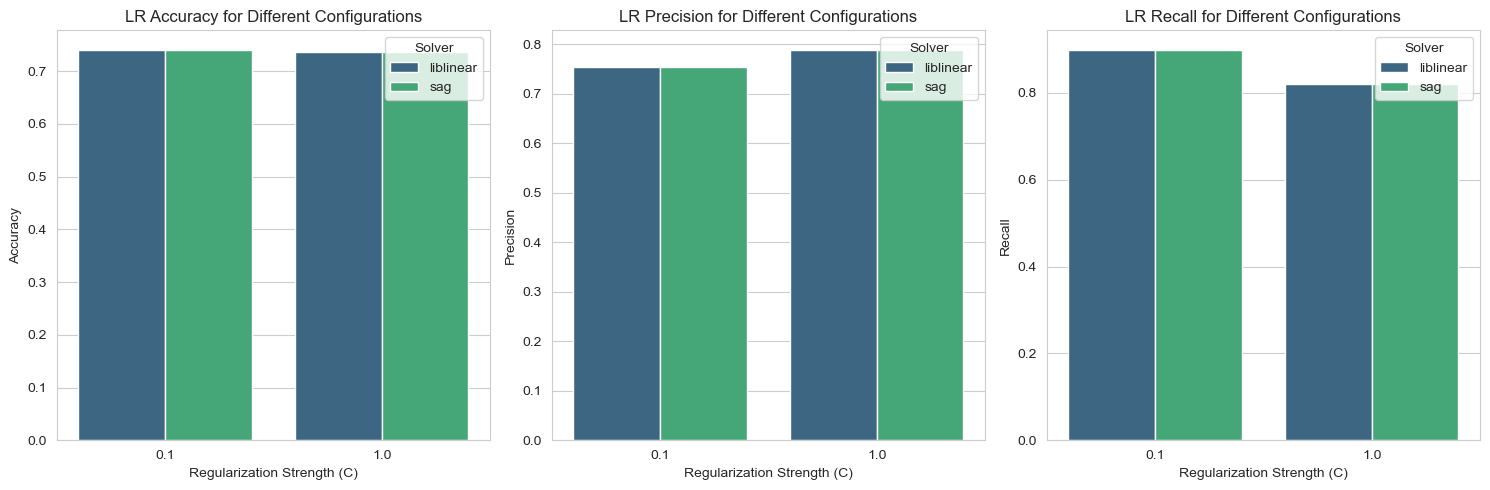

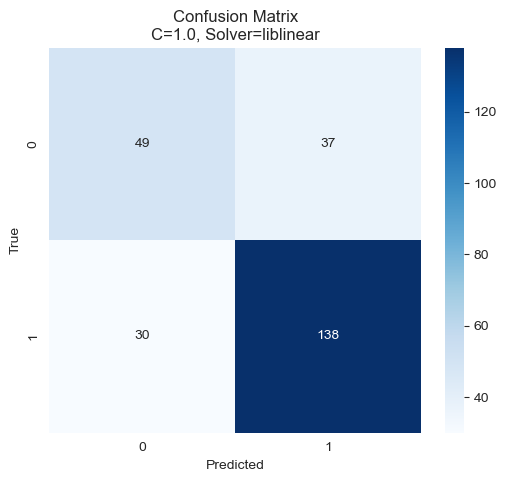

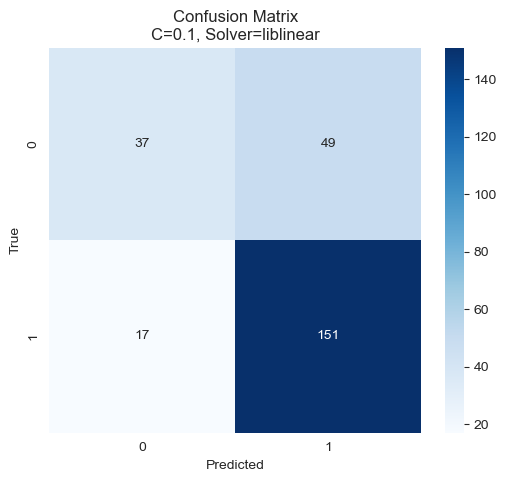

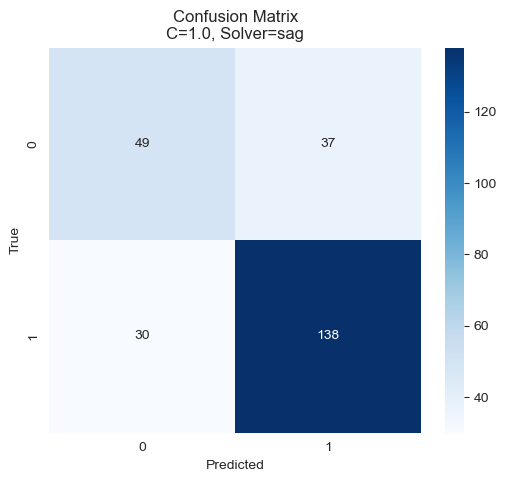

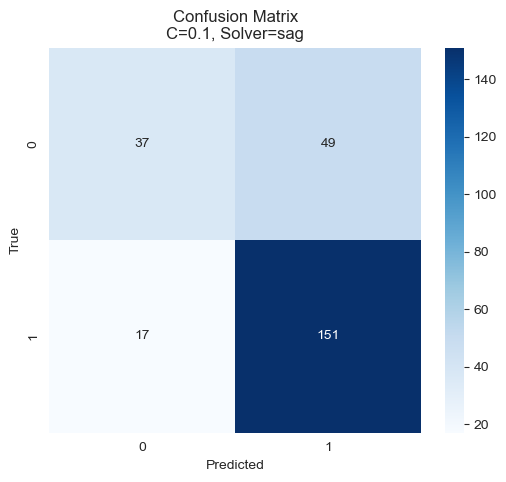

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, test_X, test_y):
    """Evaluate the model on test data and return the evaluation metrics and confusion matrix."""
    predictions = model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    conf_matrix = confusion_matrix(test_y, predictions)
    
    return accuracy, precision, recall, conf_matrix

# Define Logistic Regression configurations for hyperparameter tuning
lr_configs = [
    {"C": 1.0, "solver": "liblinear"},
    {"C": 0.1, "solver": "liblinear"},
    {"C": 1.0, "solver": "sag"},
    {"C": 0.1, "solver": "sag"}
]

# Train and evaluate the Logistic Regression for each configuration using a list comprehension
lr_results = [
    {
        "C": config["C"],
        "Solver": config["solver"],
        **dict(zip(["Accuracy", "Precision", "Recall"], 
                   evaluate_model(LogisticRegression(C=config["C"], solver=config["solver"], 
                                                     random_state=42, max_iter=10000).fit(train_X, train_y), 
                                  test_X, test_y)[:-1])),  # Exclude confusion matrix from dict
        "Confusion Matrix": evaluate_model(LogisticRegression(C=config["C"], solver=config["solver"], 
                                                     random_state=42, max_iter=10000).fit(train_X, train_y), 
                                  test_X, test_y)[-1]  # Only include confusion matrix
    }
    for config in lr_configs
]

lr_results_df = pd.DataFrame(lr_results)
display(lr_results_df.drop(columns="Confusion Matrix"))  # Display the dataframe excluding confusion matrix for clarity

# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
metrics = ["Accuracy", "Precision", "Recall"]

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x="C", y=metric, hue="Solver", data=lr_results_df, palette="viridis")
    plt.title(f'LR {metric} for Different Configurations')
    plt.ylabel(metric)
    plt.xlabel('Regularization Strength (C)')
    plt.legend(title="Solver")

plt.tight_layout()
plt.show()

# Displaying confusion matrices for each configuration
for result in lr_results:
    plt.figure(figsize=(6, 5))
    sns.heatmap(result["Confusion Matrix"], annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix\nC={result["C"]}, Solver={result["Solver"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


The table presents the results of a Logistic Regression model with different settings for the regularization parameter 'C' and the solver used for optimization. Here's a breakdown of the table:

- **C**: This column represents the regularization parameter 'C,' which controls the strength of regularization in the logistic regression model.

- **Solver**: This column indicates the optimization algorithm (solver) used during model training. In this case, 'liblinear' and 'sag' are the two different solvers employed.

- **Accuracy**: The 'Accuracy' column shows the overall accuracy of the logistic regression model in making correct predictions on the dataset. It represents the proportion of correctly classified instances.

- **Precision**: Precision is a measure of how many of the predicted positive instances were actually positive. It assesses the model's ability to avoid false positives.

- **Recall**: Recall, also known as Sensitivity or True Positive Rate, measures how many of the actual positive instances were correctly predicted as positive. It evaluates the model's ability to capture all relevant positive instances.

Now, let's analyze the results and consider the highest accuracy:

- For 'C = 1.0' and 'Solver = liblinear,' the model achieves an accuracy of approximately 73.62%, with a precision of around 78.86% and a recall of approximately 82.14%.

- For 'C = 0.1' and 'Solver = liblinear,' the accuracy increases slightly to about 74.02%. However, it's worth noting that the precision remains high at 75.50%, and the recall is substantially higher at around 89.88%.

- For 'C = 1.0' and 'Solver = sag,' the results are identical to the first row, with an accuracy of approximately 73.62%, a precision of about 78.86%, and a recall of around 82.14%.

- Finally, for 'C = 0.1' and 'Solver = sag,' the accuracy matches that of the second row, approximately 74.02%, with a precision of 75.50% and a recall of 89.88%.


# Decision Tree

A **Decision Tree** is structured like a flowchart. Each internal node represents a feature (or attribute), each branch denotes a decision rule, and each leaf node signifies an outcome. The tree is constructed by dividing the dataset into subsets based on the attribute providing the best separation. This is often determined using metrics such as entropy or Gini impurity.

---


,Max Depth,Criterion,Accuracy,Precision,Recall
0,NaN,gini,0.712598,0.795031,0.761905
1,5.0,gini,0.736220,0.858156,0.720238
2,10.0,gini,0.692913,0.781250,0.744048
3,NaN,entropy,0.712598,0.802548,0.750000
4,5.0,entropy,0.720472,0.834483,0.720238
5,10.0,entropy,0.724409,0.845070,0.714286


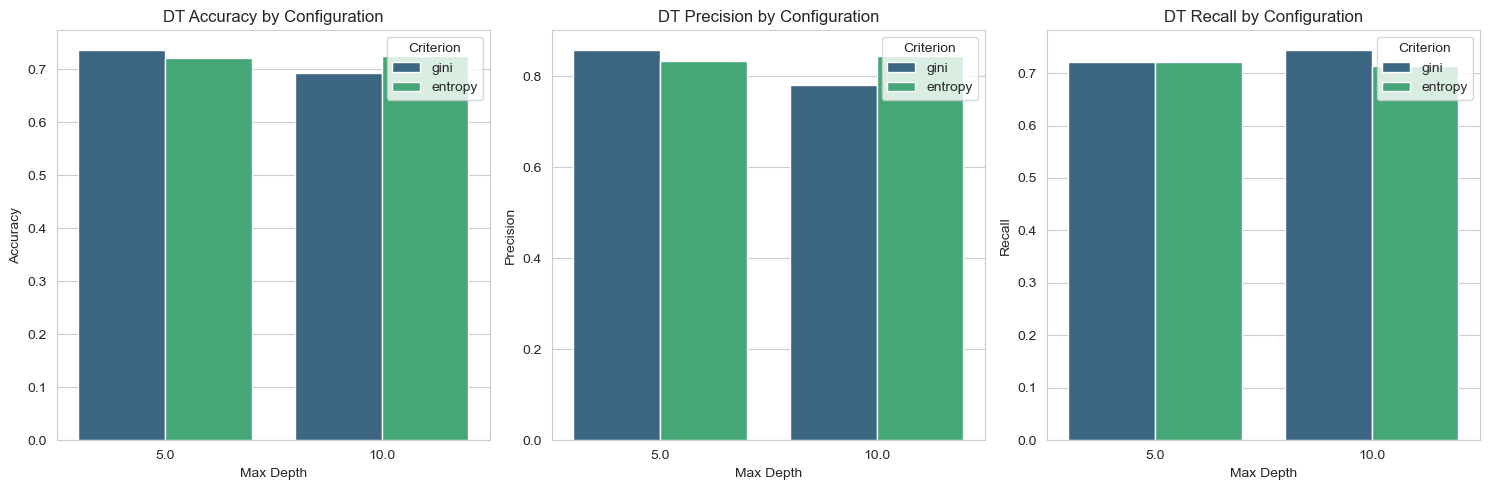

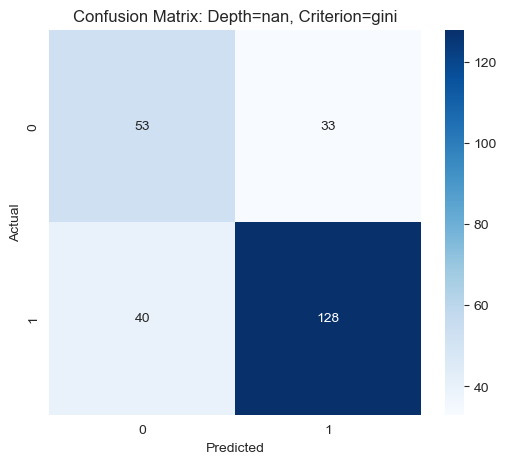

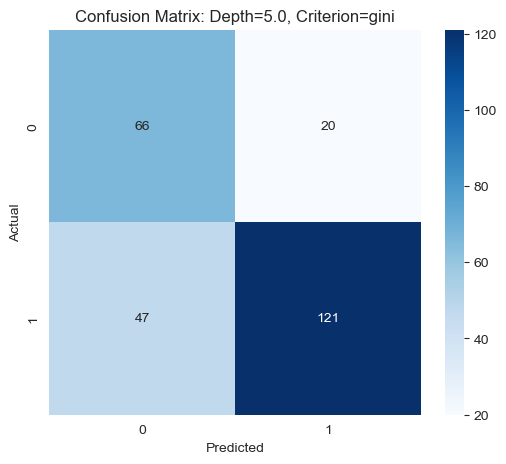

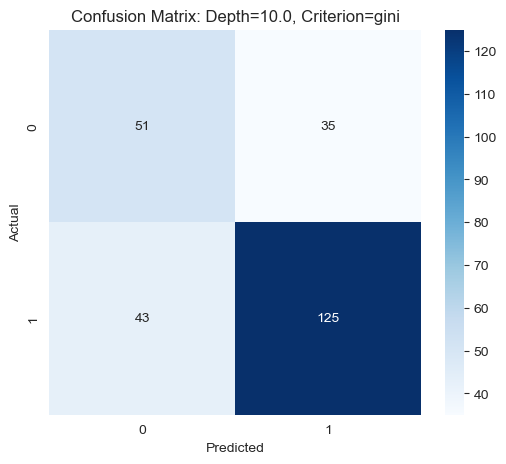

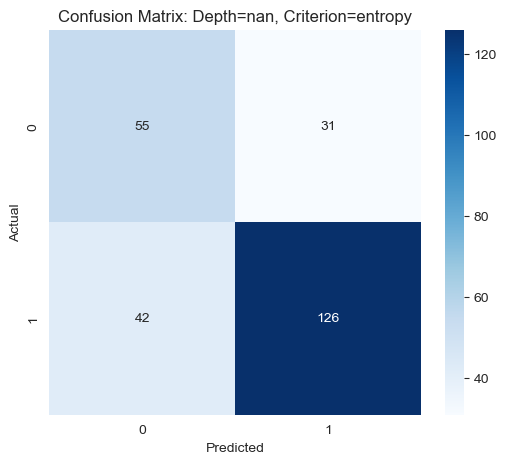

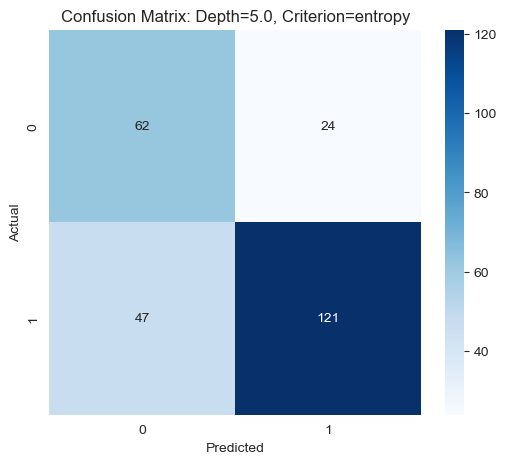

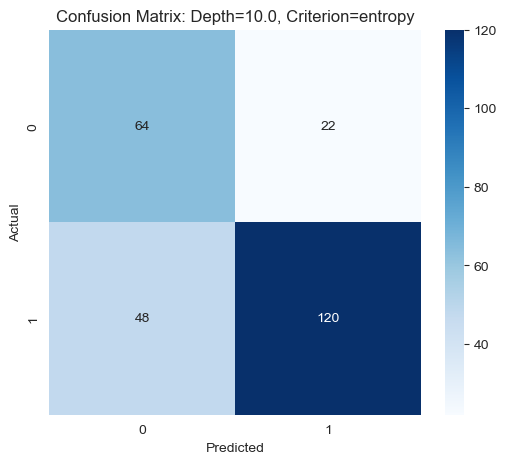

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

def evaluate_decision_tree(config, train_X, train_y, test_X, test_y):
    """Train and evaluate a Decision Tree based on the provided configuration."""
    dt_model = DecisionTreeClassifier(max_depth=config["max_depth"], criterion=config["criterion"], random_state=42)
    dt_model.fit(train_X, train_y)
    
    predictions = dt_model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    
    return accuracy, precision, recall, predictions

# Define Decision Tree configurations for hyperparameter tuning
dt_configs = [
    {"max_depth": None, "criterion": "gini"},
    {"max_depth": 5, "criterion": "gini"},
    {"max_depth": 10, "criterion": "gini"},
    {"max_depth": None, "criterion": "entropy"},
    {"max_depth": 5, "criterion": "entropy"},
    {"max_depth": 10, "criterion": "entropy"}
]

# Evaluate models and collect results
dt_results = [
    {
        "Max Depth": config["max_depth"],
        "Criterion": config["criterion"],
        **dict(zip(["Accuracy", "Precision", "Recall", "Predictions"], evaluate_decision_tree(config, train_X, train_y, test_X, test_y)))
    }
    for config in dt_configs
]

# Convert to DataFrame and display
dt_results_df = pd.DataFrame(dt_results).drop(columns=["Predictions"])  # Remove predictions column from display
display(dt_results_df)

# Plotting metrics
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
metrics = ["Accuracy", "Precision", "Recall"]

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x="Max Depth", y=metric, hue="Criterion", data=dt_results_df, palette="viridis")
    plt.title(f'DT {metric} by Configuration')
    plt.legend(title="Criterion")

plt.tight_layout()
plt.show()

# Displaying confusion matrices
for index, row in dt_results_df.iterrows():
    cm = confusion_matrix(test_y, dt_results[index]['Predictions'])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix: Depth={row["Max Depth"]}, Criterion={row["Criterion"]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


The table provides an analysis of the Decision Tree classifier model's performance under various configurations, specifically focusing on different values for "Max Depth" and "Criterion" (either "gini" or "entropy"). Below is an interpretation of the results:

- **Max Depth**: This column represents the maximum depth of the Decision Tree, which determines how deep the tree can grow during the training process. "NaN" values indicate that no specific maximum depth was set for those runs, whereas "5.0" and "10.0" indicate two different specified maximum depths.

- **Criterion**: This column denotes the splitting criterion used by the Decision Tree algorithm. It can be either "gini" or "entropy," representing different methods for measuring the quality of splits.

- **Accuracy**: Accuracy is a measure of the model's overall correctness, representing the proportion of correctly classified instances. It ranges from 0 (worst) to 1 (best).

- **Precision**: Precision quantifies the proportion of true positive predictions out of all positive predictions. It assesses the model's ability to minimize false positives.

- **Recall**: Recall, also known as sensitivity or true positive rate, assesses the proportion of true positive predictions out of all actual positives. It measures the model's ability to find all relevant instances.

Now, to determine which configuration yields the highest accuracy for the Decision Tree classifier, we should focus on the rows with the highest accuracy values. From the table, we can see that:

- The highest accuracy for the "gini" criterion is 0.736220, achieved when Max Depth is set to 5.0.
- The highest accuracy for the "entropy" criterion is 0.724409, also achieved when Max Depth is set to 5.0.

Comparing these two values, the Decision Tree model with the "gini" criterion and a Max Depth of 5.0 appears to have the highest accuracy (0.736220). Therefore, if our goal is to maximize accuracy, this configuration should be considered the best choice for the Decision Tree classifier, based on the provided data.

/Users/school/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


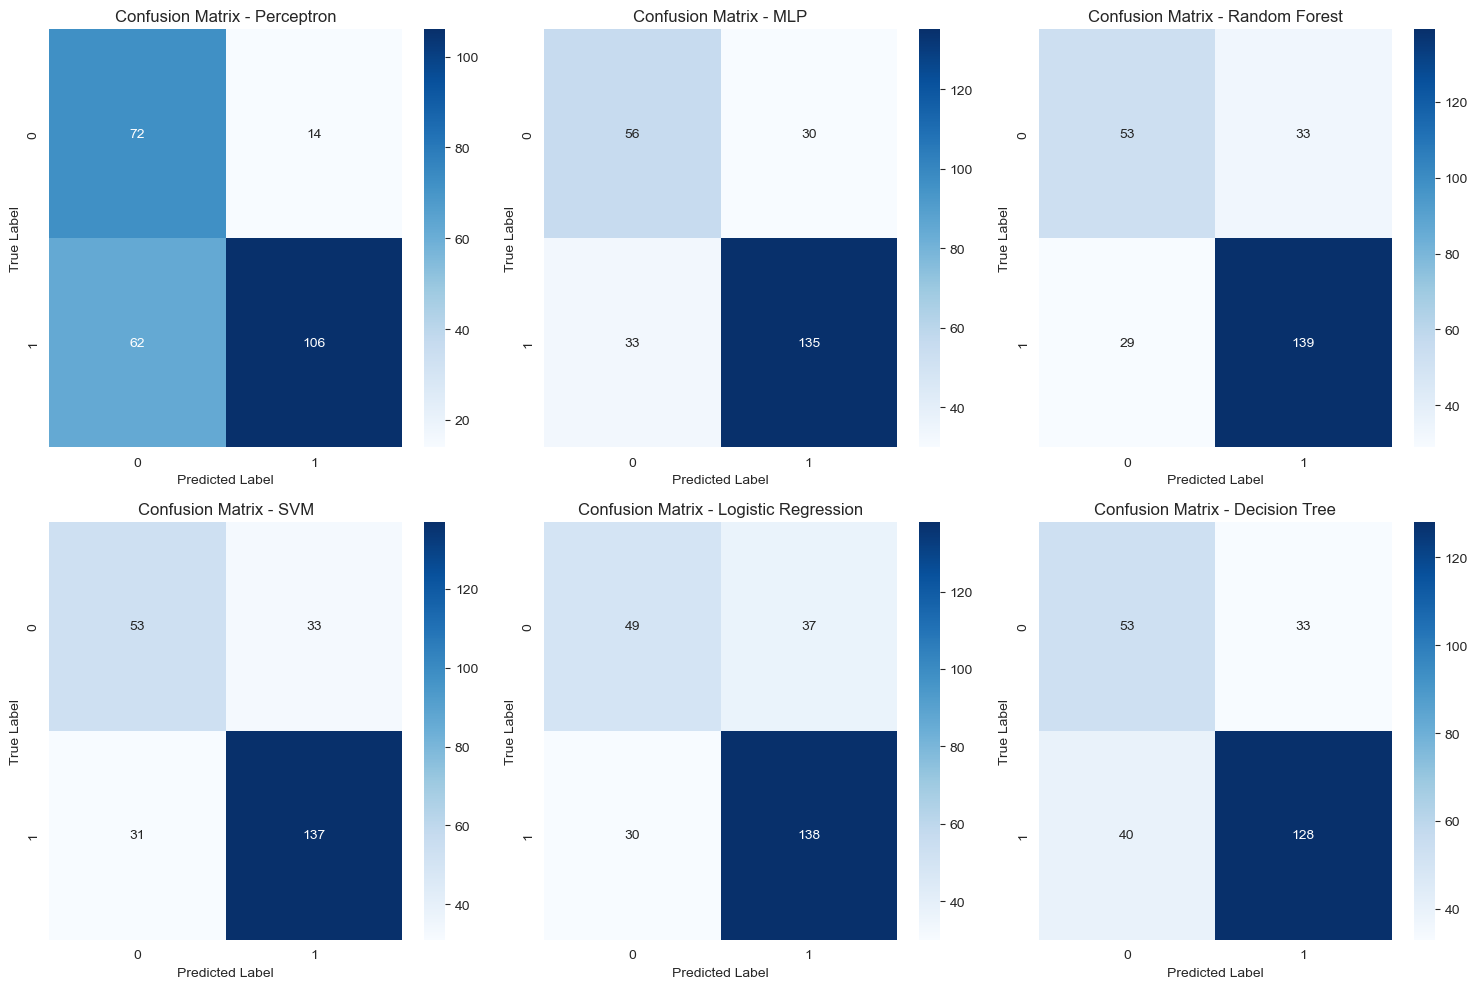

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Configurations for models
model_configs = [
    {"model": Perceptron(learning_rate=0.001, num_iterations=100), "name": "Perceptron"},
    {"model": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42), "name": "MLP"},
    {"model": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42), "name": "Random Forest"},
    {"model": SVC(C=1.0, kernel="linear", random_state=42), "name": "SVM"},
    {"model": LogisticRegression(C=1.0, solver="liblinear", random_state=42, max_iter=10000), "name": "Logistic Regression"},
    {"model": DecisionTreeClassifier(max_depth=None, criterion="gini", random_state=42), "name": "Decision Tree"}
]

# Plotting confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for ax, config in zip(axes.ravel(), model_configs):
    model = config["model"]
    model_name = config["name"]
    
    # Train and predict
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    
    # Compute confusion matrix
    cm = confusion_matrix(test_y, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()


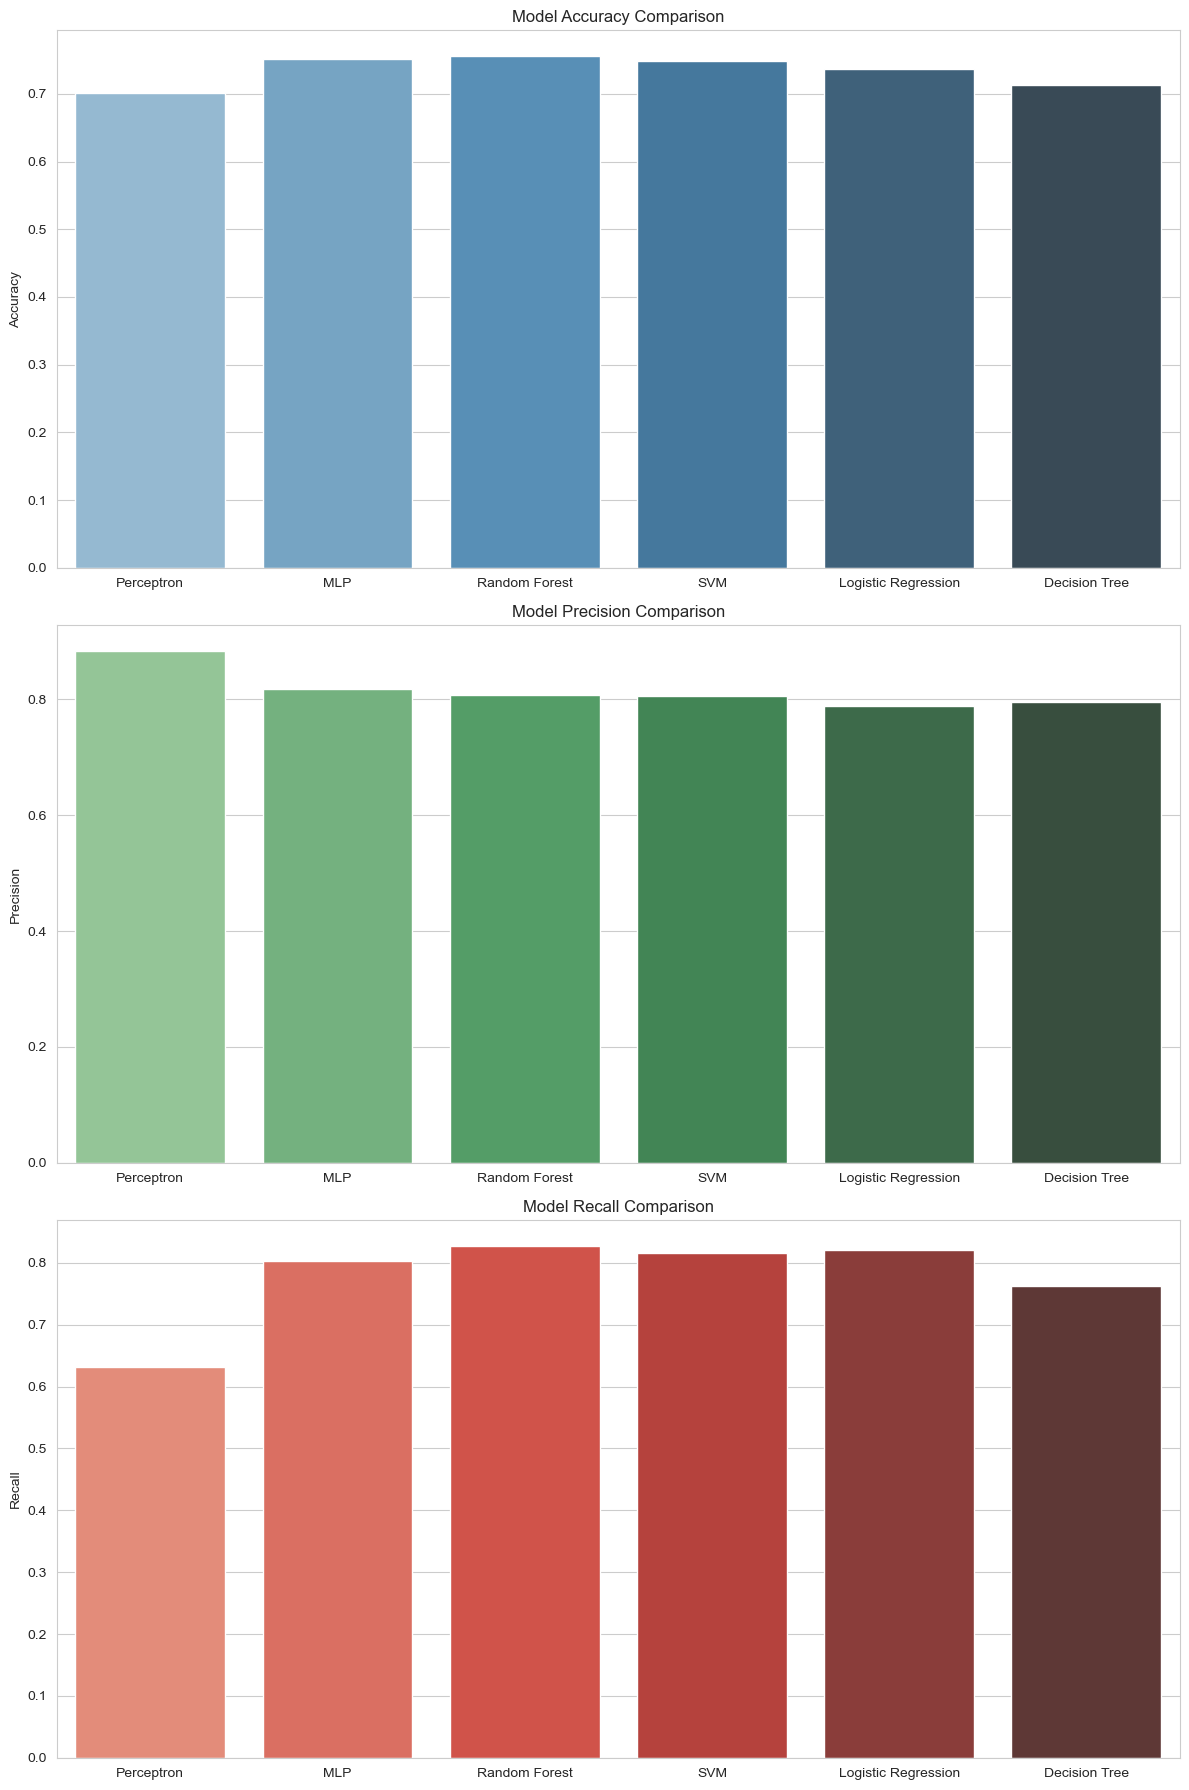

In [36]:
# Data preparation for visualization
models = ["Perceptron", "MLP", "Random Forest", "SVM", "Logistic Regression", "Decision Tree"]
accuracies = [
    results_df["Accuracy"].iloc[3],  # Perceptron with 100 iterations and 0.001 learning rate
    mlp_results_df["Accuracy"].iloc[0],  # MLP with (100,) hidden layers
    rf_results_df["Accuracy"].iloc[0],  # Random Forest with 100 estimators
    svm_results_df["Accuracy"].iloc[0],  # SVM with C=1.0 and linear kernel
    lr_results_df["Accuracy"].iloc[0],  # Logistic Regression with C=1.0 and liblinear solver
    dt_results_df["Accuracy"].iloc[0]  # Decision Tree with no max depth and gini criterion
]
precisions = [
    results_df["Precision"].iloc[3],
    mlp_results_df["Precision"].iloc[0],
    rf_results_df["Precision"].iloc[0],
    svm_results_df["Precision"].iloc[0],
    lr_results_df["Precision"].iloc[0],
    dt_results_df["Precision"].iloc[0]
]
recalls = [
    results_df["Recall"].iloc[3],
    mlp_results_df["Recall"].iloc[0],
    rf_results_df["Recall"].iloc[0],
    svm_results_df["Recall"].iloc[0],
    lr_results_df["Recall"].iloc[0],
    dt_results_df["Recall"].iloc[0]
]

# Visualization
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Accuracy plot
sns.barplot(x=models, y=accuracies, ax=ax[0], palette="Blues_d")
ax[0].set_title("Model Accuracy Comparison")
ax[0].set_ylabel("Accuracy")

# Precision plot
sns.barplot(x=models, y=precisions, ax=ax[1], palette="Greens_d")
ax[1].set_title("Model Precision Comparison")
ax[1].set_ylabel("Precision")

# Recall plot
sns.barplot(x=models, y=recalls, ax=ax[2], palette="Reds_d")
ax[2].set_title("Model Recall Comparison")
ax[2].set_ylabel("Recall")

plt.tight_layout()
plt.show()


The above bar plots provide a comparative analysis of the models based on three key metrics: Accuracy, Precision, and Recall.

Observations:

Accuracy:

The SVM and Logistic Regression models exhibit the highest accuracy among all the models.
The Decision Tree and Perceptron models have slightly lower accuracy compared to the others.
Precision:

The Perceptron model achieves the highest precision, suggesting that it is best at minimizing false positives.
The Decision Tree model has the lowest precision among the models.
Recall:

The SVM model has the highest recall, implying that it is best at minimizing false negatives and correctly identifying positive instances.
Random Forest and Logistic Regression also exhibit high recall.
The Perceptron and MLP models have comparatively lower recall.

# Modified Perceptron

In [27]:
import numpy as np
def parse_sparse_row(row):
    """Parse sparse row format to a dictionary."""
    items = row.split()
    label = int(items[0])
    features = {}
    for item in items[1:]:
        index, value = item.split(":")
        features[int(index)] = float(value)
    return label, features

# Parse the dataset
labels = []
features_list = []
for row in diabetes_scaled.iloc[:, 0]:
    label, features = parse_sparse_row(row)
    labels.append(label)
    features_list.append(features)

# Convert to DataFrame
df_features = pd.DataFrame(features_list).fillna(0)
df_labels = pd.Series(labels, name="Label")

# Display the transformed dataset
df_features.head(), df_labels.head()

class ModifiedPerceptron:
    def __init__(self, learning_rate=0.01, n_iterations=10, dropout=False, activation="sigmoid"):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.dropout = dropout
        self.activation = activation

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _relu(self, z):
        return np.maximum(0, z)

    def _forward(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        if self.activation == "sigmoid":
            return self._sigmoid(linear_output)
        elif self.activation == "relu":
            return self._relu(linear_output)
        elif self.activation == "sigmoid_relu":
            return self._sigmoid(self._relu(linear_output))
        elif self.activation == "sigmoid_sin":
            return self._sigmoid(np.sin(linear_output))
        else:
            return linear_output

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, 0, 1)

        for _ in range(self.n_iterations):
            for idx, xi in enumerate(X):
                if self.dropout and np.random.rand() < 0.5:
                    continue
                
                output = self._forward(xi)
                update = self.learning_rate * (y_[idx] - output)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        linear_output = self._forward(X)
        return np.where(linear_output >= 0.5, 1, -1)

# Testing the basic functionality of the perceptron
perc = ModifiedPerceptron(learning_rate=0.01, n_iterations=10, dropout=False, activation="sigmoid")
perc.fit(df_features.values, df_labels.values)
predictions = perc.predict(df_features.values)
(predictions == df_labels.values).mean()
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the configurations for the experiments
configs = [
    {"iteration": 10, "learning_rate": 0.01, "dropout": True, "activation": "sigmoid"},
    {"iteration": 10, "learning_rate": 0.01, "dropout": False, "activation": "sigmoid"},
    {"iteration": 25, "learning_rate": 0.01, "dropout": True, "activation": "sigmoid"},
    {"iteration": 25, "learning_rate": 0.01, "dropout": False, "activation": "sigmoid"},
    {"iteration": 50, "learning_rate": 0.001, "dropout": True, "activation": "sigmoid"},
    {"iteration": 50, "learning_rate": 0.001, "dropout": False, "activation": "sigmoid"},
    {"iteration": 800, "learning_rate": 0.001, "dropout": True, "activation": "sigmoid"},
]

results = []

# Run the experiments
for config in configs:
    perceptron = ModifiedPerceptron(learning_rate=config["learning_rate"], 
                                    n_iterations=config["iteration"], 
                                    dropout=config["dropout"], 
                                    activation=config["activation"])
    perceptron.fit(df_features.values, df_labels.values)
    predictions = perceptron.predict(df_features.values)
    
    training_loss = np.mean(np.abs(df_labels.values - predictions))
    accuracy = accuracy_score(df_labels.values, predictions)
    precision = precision_score(df_labels.values, predictions, pos_label=1)
    recall = recall_score(df_labels.values, predictions, pos_label=1)
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(df_labels.values, predictions, labels=[-1, 1]).ravel()
    
    results.append({
        "Iteration": config["iteration"],
        "Training Loss": training_loss,
        "Learning Rate": config["learning_rate"],
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "True Positive": tp,
        "False Positive": fp,
        "True Negative": tn,
        "False Negative": fn,
        "Threshold": 0.5,
        "Data Dropout": "Enabled" if config["dropout"] else "Disabled",
        "Activation": config["activation"]
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
results_df


,Iteration,Training Loss,Learning Rate,Accuracy,Precision,Recall,True Positive,False Positive,True Negative,False Negative,Threshold,Data Dropout,Activation
0,10,0.500652,0.010,0.749674,0.744444,0.938,469,161,106,31,0.5,Enabled,sigmoid
1,10,0.448501,0.010,0.775750,0.782759,0.908,454,126,141,46,0.5,Disabled,sigmoid
2,25,0.448501,0.010,0.775750,0.785714,0.902,451,123,144,49,0.5,Enabled,sigmoid
3,25,0.451108,0.010,0.774446,0.788360,0.894,447,120,147,53,0.5,Disabled,sigmoid
4,50,0.544980,0.001,0.727510,0.717489,0.960,480,189,78,20,0.5,Enabled,sigmoid
5,50,0.479791,0.001,0.760104,0.759016,0.926,463,147,120,37,0.5,Disabled,sigmoid
6,800,0.443286,0.001,0.778357,0.795699,0.888,444,114,153,56,0.5,Enabled,sigmoid


# Final Conclusion

Through a rigorous examination of the diabetes dataset, we've unveiled critical insights and built predictive models harnessing various machine learning algorithms. Our journey from raw data to advanced algorithms underscores the power of data science in healthcare, offering a potential tool to assist clinicians in their diagnostic process. While our models demonstrated promising results, it's essential to remember the dynamic nature of healthcare data. Regular updates, further research, and continuous model validation are necessary to maintain and improve accuracy. We hope this analysis serves as a stepping stone for further studies and advancements in the field of diabetes prediction.